# <font color=blue>**PROYECTO FINAL - CLASIFICACIÓN BINARIA (HUNDIMIENTO DE TITANIC)** 

## <font color=blue>**PARTE 1: Entrenamiento y validación y selección**

In [1]:
import numpy as np
import imageio as imio
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, os
import tensorflow as tf
import pandas as pd
import statistics as st
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import datetime, os

In [2]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [3]:
Titanic_Data = pd.read_csv('data_titanic_proyecto.csv')
Titanic_Data

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,Middle,M,N
887,888,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,Upper,F,Y
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,Lower,F,N
889,890,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,Upper,M,Y


In [4]:
Titanic_Data.shape

(891, 12)

### <font color=blue>**1.1. Analisis De Variables**  

**Variables Categoricas**

	- Name -> Se descarta ya que solo provee informacion descriptiva
	- Ticket -> Se descarta ya que solo provee informacion descriptiva
	- Embarked 
	- passenger_class 
	- passenger_sex 
	- Cabin   -> Se descarta ya que sel 77% de datos es nulo

**Variables Numericas**

	- PassengerId -> Se descarta ya que solo provee informacion descriptiva
	- Age 
	- SibSp 
	- Parch 
	- Fare 

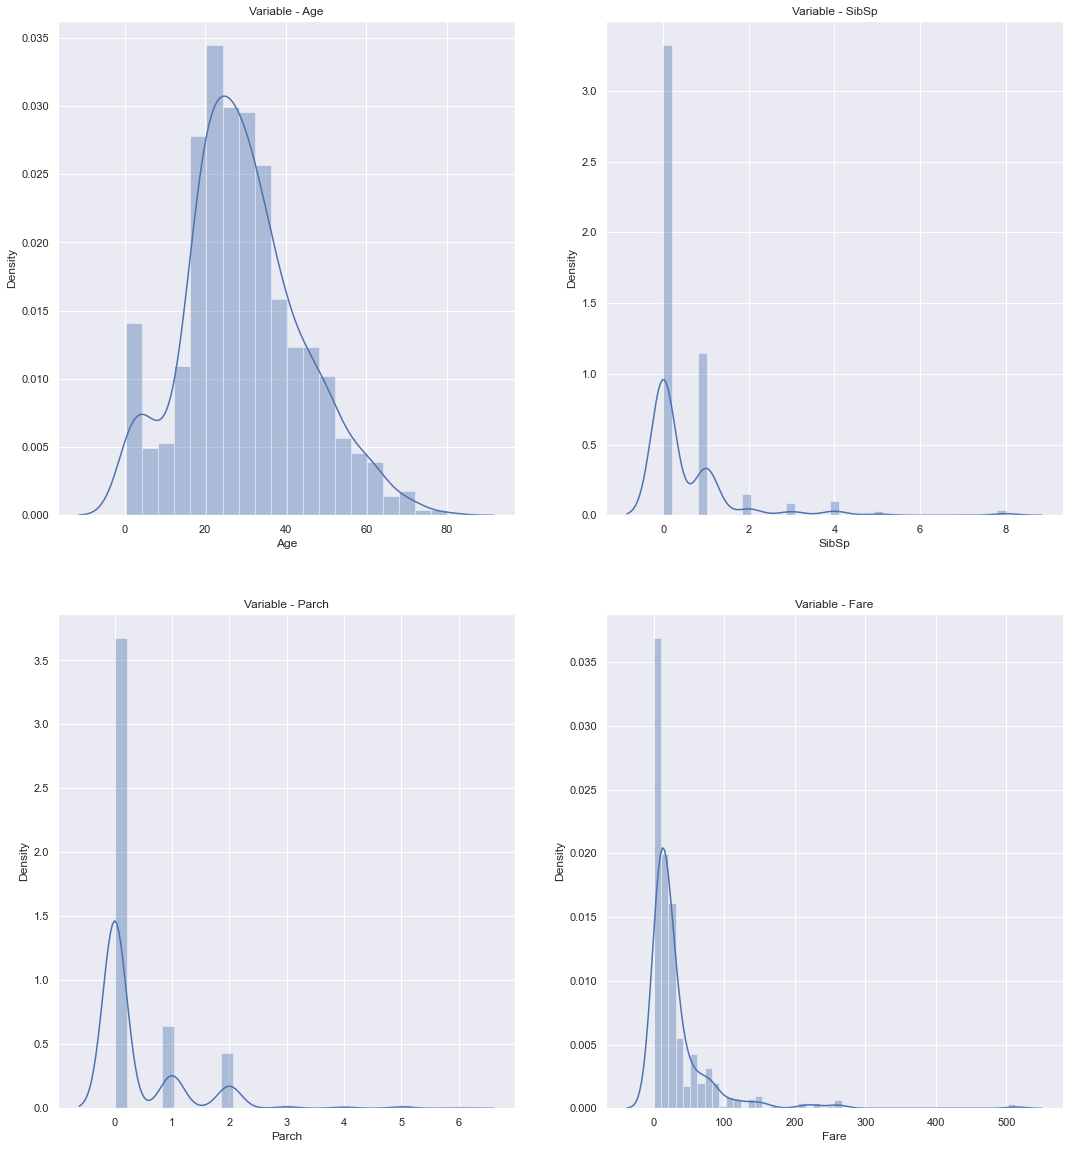

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme();
fig, ax = plt.subplots(2, 2,figsize=(18, 20))

ax[0,0].set_title('Variable - Age')
sns.distplot(Titanic_Data.iloc[:,2],ax=ax[0,0])

ax[0,1].set_title('Variable - SibSp')
sns.distplot(Titanic_Data.iloc[:,3],ax=ax[0,1])

ax[1,0].set_title('Variable - Parch')
sns.distplot(Titanic_Data.iloc[:,4],ax=ax[1,0])

ax[1,1].set_title('Variable - Fare')
sns.distplot(Titanic_Data.iloc[:,6],ax=ax[1,1])

plt.show()

### <font color=blue>**1.2. Feature Engineering**  

In [6]:
DataFE = Titanic_Data.copy()

In [7]:
DataFE = DataFE.drop(["Name","Ticket","Cabin","PassengerId"], axis=1)

<font color=blue>**1.2.1. Data Imputation**  

In [8]:
#LISTADO DE VARIABLES CON N/A
DataFE.isnull().sum()

Age                   177
SibSp                   0
Parch                   0
Fare                    0
Embarked                2
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

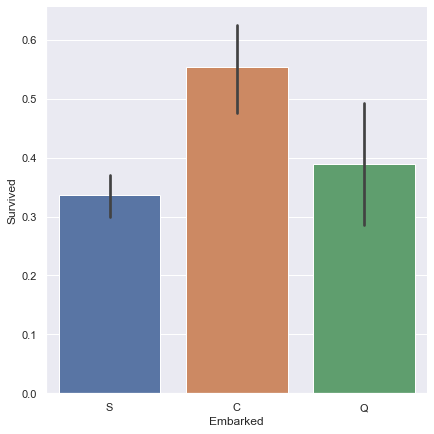

In [9]:
D = Titanic_Data.copy()
D["Survived"] = np.where(D.passenger_survived == 'Y', 1, 0)
g = sns.catplot(x="Embarked", y="Survived",  data=D,height=6, kind="bar")

In [10]:
#IMPUTACION CATEGORIA (mas del 50% que sobrevivio es categoria 'C')
DataFE["Embarked"] = DataFE["Embarked"]. fillna("C")

Age has 177 null values.
Age_Mean has 0 null values.
Age_Media has 0 null values.
Age_Random has 0 null values.


<AxesSubplot:ylabel='Density'>

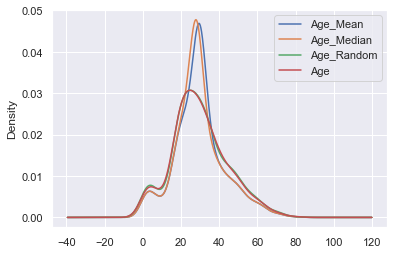

In [11]:
#IMPUTACION DE MEDIA/MEDIANA

print('Age has {} null values.'.format(DataFE.isnull().sum()['Age']))
DataFE['Age_Mean'] = DataFE['Age'].fillna((DataFE['Age'].mean()))
DataFE['Age_Median'] = DataFE['Age'].fillna((DataFE['Age'].median()))
print('Age_Mean has {} null values.'.format(DataFE.isnull().sum()['Age_Mean']))
print('Age_Media has {} null values.'.format(DataFE.isnull().sum()['Age_Median']))


#IMPUTACION RANDOM
#max(DataFE['Age'])  -> 74
DataFE['Age_Random'] = DataFE['Age']
nas = DataFE['Age_Random'].isnull()
DataFE.loc[nas, 'Age_Random'] = np.random.choice(DataFE.loc[~nas, 'Age_Random'], replace=True, size=sum(nas))
print('Age_Random has {} null values.'.format(DataFE.isnull().sum()['Age_Random']))

DataFE[[ "Age_Mean", "Age_Median","Age_Random","Age"]].plot.kde()

In [12]:
#La mejor imputacion es random
DataFE['Age'] = DataFE['Age_Random'] 
DataFE = DataFE.drop(["Age_Random","Age_Median","Age_Mean"], axis=1)

<font color=blue>**1.2.2. Codificacion de Variables Categoricas**  

In [13]:
#Frequency Encoding
Embarked_FE  = (DataFE.groupby('Embarked').size()) / len(DataFE)
print(Embarked_FE)
DataFE['Embarked_FE'] = DataFE['Embarked'].apply(lambda x : Embarked_FE[x])

Embarked
C    0.190797
Q    0.086420
S    0.722783
dtype: float64


In [14]:
passenger_class_FE  = (DataFE.groupby('passenger_class').size()) / len(DataFE)
print(passenger_class_FE)
DataFE['passenger_class_FE'] = DataFE['passenger_class'].apply(lambda x : passenger_class_FE[x])

passenger_class
Lower     0.551066
Middle    0.206510
Upper     0.242424
dtype: float64


In [15]:
passenger_sex_FE  = (DataFE.groupby('passenger_sex').size()) / len(DataFE)
print(passenger_sex_FE)
DataFE['passenger_sex_FE'] = DataFE['passenger_sex'].apply(lambda x : passenger_sex_FE[x])

passenger_sex
F    0.352413
M    0.647587
dtype: float64


In [16]:
DataFE = DataFE.drop(["Embarked","passenger_class","passenger_sex"], axis=1)
DataFE

,Age,SibSp,Parch,Fare,passenger_survived,Embarked_FE,passenger_class_FE,passenger_sex_FE
0,22.0,1,0,7.2500,N,0.722783,0.551066,0.647587
1,38.0,1,0,71.2833,Y,0.190797,0.242424,0.352413
2,26.0,0,0,7.9250,Y,0.722783,0.551066,0.352413
3,35.0,1,0,53.1000,Y,0.722783,0.242424,0.352413
4,35.0,0,0,8.0500,N,0.722783,0.551066,0.647587
...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,N,0.722783,0.206510,0.647587
887,19.0,0,0,30.0000,Y,0.722783,0.242424,0.352413
888,27.0,1,2,23.4500,N,0.722783,0.551066,0.352413
889,26.0,0,0,30.0000,Y,0.190797,0.242424,0.647587


<font color=blue>**1.2.3.Tratamiento Outliers** 

<AxesSubplot:xlabel='Age'>

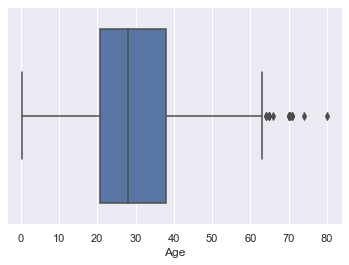

In [17]:
sns.boxplot(data=DataFE,x=DataFE["Age"])

<AxesSubplot:xlabel='Age'>

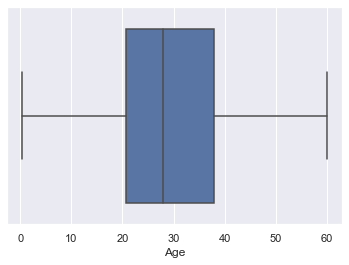

In [18]:
IQR = DataFE["Age"].quantile(0.75)-DataFE["Age"].quantile(0.25)
LS  = round(st.mean(DataFE["Age"]) + 1.75*IQR)
LI  = round(st.mean(DataFE["Age"]) - 1.75*IQR)

DataFE["Age"] = np.where(DataFE["Age"] >= LS, LS, np.where(DataFE["Age"] <= LI, LI, DataFE["Age"])) 

sns.boxplot(data=DataFE,x=DataFE["Age"])

<AxesSubplot:xlabel='Fare'>

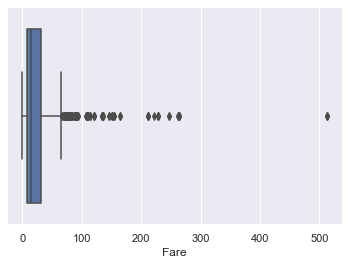

In [19]:
sns.boxplot(data=DataFE,x=DataFE["Fare"])

72.61100796857464 -8.202592031425368


<AxesSubplot:xlabel='Fare'>

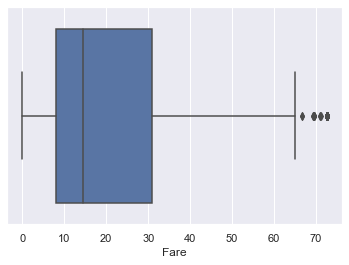

In [20]:
IQR2 = DataFE["Fare"].quantile(0.75)-DataFE["Fare"].quantile(0.25)
LS2  = st.mean(DataFE["Fare"]) + 1.75*IQR2
LI2  = st.mean(DataFE["Fare"]) - 1.75*IQR2
print(LS2,LI2)
DataFE["Fare"] = np.where(DataFE["Fare"] >= LS2, LS2, np.where(DataFE["Fare"] <= LI2, LI2, DataFE["Fare"])) 

sns.boxplot(data=DataFE, x = DataFE["Fare"])

<AxesSubplot:xlabel='SibSp'>

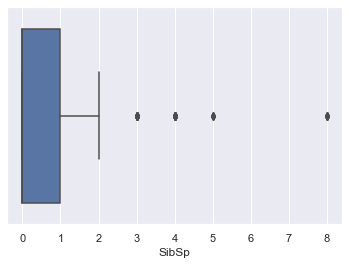

In [21]:
sns.boxplot(data=DataFE,x=DataFE["SibSp"])

<AxesSubplot:xlabel='Parch'>

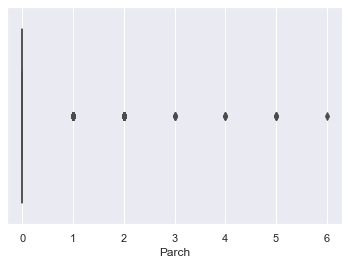

In [22]:
sns.boxplot(data=DataFE,x=DataFE["Parch"])

<font color=blue>**1.2.4. Transformacion de Variables** 

In [23]:
import statsmodels.api as sm
import pylab as py
from sklearn.preprocessing import PowerTransformer

In [24]:
#sm.qqplot(DataFE["Fare"], line ='45')

In [25]:
#sm.qqplot(DataFE["Age"], line ='45')

In [26]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(DataFE.iloc[:,[0,1,2,3,5,6,7]])
train_data_trans = pt.transform(DataFE.iloc[:,[0,1,2,3,5,6,7]])
train_data_trans

array([[-0.49018699,  1.37363642, -0.56025296, ...,  0.61921649,
         0.90100771,  0.73769513],
       [ 0.613771  ,  1.37363642, -0.56025296, ..., -1.59269893,
        -1.02452548, -1.35557354],
       [-0.20369443, -0.67984996, -0.56025296, ...,  0.61921649,
         0.90100771, -1.35557354],
       ...,
       [-0.13333226,  1.37363642,  1.84685634, ...,  0.61921649,
         0.90100771, -1.35557354],
       [-0.20369443, -0.67984996, -0.56025296, ..., -1.59269893,
        -1.02452548,  0.73769513],
       [ 0.21191811, -0.67984996, -0.56025296, ..., -1.66255323,
         0.90100771,  0.73769513]])

In [27]:
DataFE["Age"] = train_data_trans[:,0]
DataFE["SibSp"] = train_data_trans[:,1]
DataFE["Parch"] = train_data_trans[:,2]
DataFE["Fare"] = train_data_trans[:,3]
DataFE["Embarked_FE"] = train_data_trans[:,4]
DataFE["passenger_class_FE"] = train_data_trans[:,5]
DataFE["passenger_sex_FE"] = train_data_trans[:,6]

<font color=blue>**1.2.4. Feature Scaling** 

<AxesSubplot:ylabel='Density'>

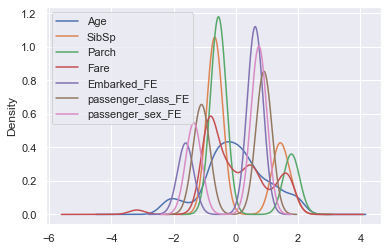

In [28]:
DataFE[[ "Age", "SibSp","Parch","Fare","Embarked_FE","passenger_class_FE", "passenger_sex_FE"]].plot.kde()

<AxesSubplot:ylabel='Density'>

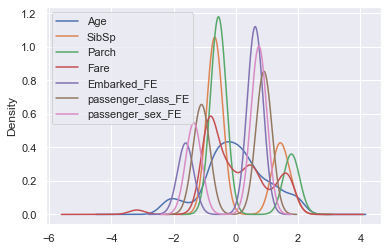

In [29]:
for col in DataFE.columns:
    if col != "passenger_survived":
        scale = StandardScaler().fit(DataFE[[col]])
        DataFE[col] = scale.transform(DataFE[[col]]) 
            
DataFE[[ "Age", "SibSp","Parch","Fare","Embarked_FE","passenger_class_FE", "passenger_sex_FE"]].plot.kde()

In [30]:
DataFE

,Age,SibSp,Parch,Fare,passenger_survived,Embarked_FE,passenger_class_FE,passenger_sex_FE
0,-0.490187,1.373636,-0.560253,-0.935486,N,0.619216,0.901008,0.737695
1,0.613771,1.373636,-0.560253,1.648107,Y,-1.592699,-1.024525,-1.355574
2,-0.203694,-0.679850,-0.560253,-0.846928,Y,0.619216,0.901008,-1.355574
3,0.414387,1.373636,-0.560253,1.285889,Y,0.619216,-1.024525,-1.355574
4,0.414387,-0.679850,-0.560253,-0.831228,N,0.619216,0.901008,0.737695
...,...,...,...,...,...,...,...,...
886,-0.133332,-0.679850,-0.560253,-0.332860,N,0.619216,-1.201616,0.737695
887,-0.711092,-0.679850,-0.560253,0.605100,Y,0.619216,-1.024525,-1.355574
888,-0.133332,1.373636,1.846856,0.320918,N,0.619216,0.901008,-1.355574
889,-0.203694,-0.679850,-0.560253,0.605100,Y,-1.592699,-1.024525,0.737695


<font color=blue>**1.2.5. Correlacion** 

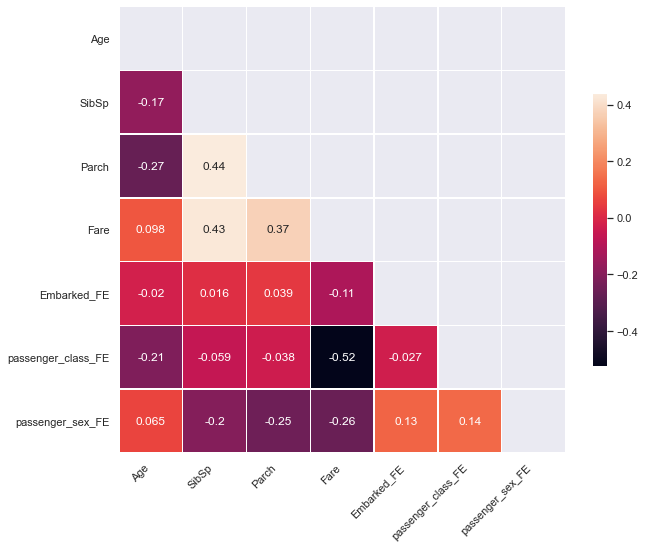

In [31]:
fig2, ax2 = plt.subplots(figsize=(10,10))

sns.set_theme(style="white")
corr = DataFE.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(4, 20, as_cmap=True)
sns.heatmap(corr,square=True,linewidths=.5, cbar_kws={"shrink": .5},annot=True,ax=ax2,mask=mask)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,horizontalalignment='right');

### <font color=blue>**1.3. Train-val-test split**  

In [32]:
np.random.seed(1234)

#SPLIT DE DATOS TRAIN Y TEST
X_Train, X_Test, Y_Train, Y_Test = train_test_split(DataFE.iloc[:,[0,1,2,3,5,6,7]], DataFE.iloc[:,[4]], test_size=0.2)
#SPLIT DE DATOS VALIDATION
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X_Train.iloc[:,[0,1,2,3,4,5,6]], Y_Train.iloc[:,[0]], test_size=0.2)
#print(Y_Train.shape)
#print(Y_Test.shape)
#print(Y_Val.shape)
#print(X_Test.iloc[[0,1,2,3,4,5,6,7,8,9],:])

### <font color=blue>**1.4. Ensemble Learning**  

In [33]:
import csv
from joblib import dump, load

def Write_Log(file_name, info):
    with open(file_name, 'a+', newline='') as write_obj:
        csv_writer = csv.writer(write_obj)
        csv_writer.writerow(info)

<font color=blue>**1.4.1. Arbol de decisión**

In [34]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import metrics

In [35]:
def Train_ArbolDeDecision(X, Y, criterio = "entropy", depth = 20):
    tree = DTC(criterion=criterio, splitter = 'best', max_depth= depth)
    tree.fit(X, Y.values.ravel())
    pred = tree.predict(X)
    
    precision = "{:0.2f}".format(metrics.precision_score(Y, pred,pos_label='Y'))
    recall = "{:0.2f}".format(metrics.recall_score(Y, pred,pos_label='Y'))
    f1 = "{:0.2f}".format(metrics.f1_score(Y, pred,pos_label='Y'))
    accuracy =  "{:0.2f}".format(metrics.accuracy_score(Y, pred))
    info ="DTC_"+ "Criterio="+criterio+"_Depth="+str(depth)+"_Variables="+ str(X.columns.values).replace('\n', '').replace('\r', '') +"_P="+precision+"_C="+recall+"_F1="+f1+"_A="+accuracy
    
    Write_Log("Bitacora_Experimentos.csv",[info])
    dump(tree, info+ ".joblib") 
    
    print(info)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F1:",f1)
    print("Accuracy:",accuracy)
    
    return tree

In [36]:
modeloAD1 = Train_ArbolDeDecision(X_Train, Y_Train,"entropy",10)

DTC_Criterio=entropy_Depth=10_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.98_C=0.82_F1=0.89_A=0.93
Precision: 0.98
Recall: 0.82
F1: 0.89
Accuracy: 0.93


In [37]:
modeloAD2 = Train_ArbolDeDecision(X_Train, Y_Train,"gini",10)

DTC_Criterio=gini_Depth=10_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.99_C=0.86_F1=0.92_A=0.95
Precision: 0.99
Recall: 0.86
F1: 0.92
Accuracy: 0.95


In [38]:
modeloAD3 = Train_ArbolDeDecision(X_Train, Y_Train,"gini",20)

DTC_Criterio=gini_Depth=20_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=1.00_C=0.97_F1=0.99_A=0.99
Precision: 1.00
Recall: 0.97
F1: 0.99
Accuracy: 0.99


In [39]:
modeloAD4 = Train_ArbolDeDecision(X_Train, Y_Train,"entropy",20)

DTC_Criterio=entropy_Depth=20_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=1.00_C=0.96_F1=0.98_A=0.98
Precision: 1.00
Recall: 0.96
F1: 0.98
Accuracy: 0.98


<font color=blue>**1.4.2. SVM** 

In [40]:
from sklearn.svm import SVC

In [41]:
def Train_SVM(X, Y, krl = "rbf",c = 0.5):
    svm_c = SVC(kernel=krl, C= c) 
    svm_c.fit(X, Y.values.ravel())
    pred = svm_c.predict(X)
    
    precision = "{:0.2f}".format(metrics.precision_score(Y, pred,pos_label='Y'))
    recall = "{:0.2f}".format(metrics.recall_score(Y, pred,pos_label='Y'))
    f1 = "{:0.2f}".format(metrics.f1_score(Y, pred,pos_label='Y'))
    accuracy = "{:0.2f}".format(metrics.accuracy_score(Y, pred))
    info = "SVM_"+"_Kernel="+krl+"_Gamma="+" "+"_Variables="+ str(X.columns.values).replace('\n', '').replace('\r', '')+"_P="+precision+"_C="+recall+"_F1="+f1+"_A="+accuracy

    Write_Log("Bitacora_Experimentos.csv",[info])
    dump(svm_c, info+ ".joblib") 
    
    print(info)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F1:",f1)
    print("Accuracy:",accuracy)
    
    return svm_c

In [42]:
modeloSVM1 = Train_SVM(X_Train, Y_Train,"sigmoid",0.9)

SVM__Kernel=sigmoid_Gamma= _Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.55_C=0.51_F1=0.53_A=0.66
Precision: 0.55
Recall: 0.51
F1: 0.53
Accuracy: 0.66


In [43]:
modeloSVM2 = Train_SVM(X_Train, Y_Train,"linear",0.9)

SVM__Kernel=linear_Gamma= _Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.71_C=0.67_F1=0.69_A=0.77
Precision: 0.71
Recall: 0.67
F1: 0.69
Accuracy: 0.77


In [44]:
modeloSVM3 = Train_SVM(X_Train, Y_Train,"rbf",0.9)

SVM__Kernel=rbf_Gamma= _Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.93_C=0.64_F1=0.76_A=0.85
Precision: 0.93
Recall: 0.64
F1: 0.76
Accuracy: 0.85


<font color=blue>**1.4.3. Naive bayes**

In [45]:
def Naive_Fit(X,Y):
    samples, features = X.shape
    y_class = np.unique(Y)
    n_class = len(y_class)
    
    mean = np.array(X.groupby(by=Y).mean())
    var = np.array(X.groupby(by=Y).var())
    priors = np.array(X.groupby(by=Y).count()/samples)

    pred = Naive_Predict(X, mean,var,priors,y_class)
    
    precision = "{:0.2f}".format(metrics.precision_score(Y, pred,pos_label='Y'))
    recall = "{:0.2f}".format(metrics.recall_score(Y, pred,pos_label='Y'))
    f1 = "{:0.2f}".format(metrics.f1_score(Y, pred,pos_label='Y'))
    accuracy = "{:0.2f}".format(metrics.accuracy_score(Y, pred))
    info = "NaiveBayes_"+"Variables="+ str(X.columns.values).replace('\n', '').replace('\r', '')+"_P="+precision+"_C="+recall+"_F1="+f1+"_A="+accuracy
   
    Write_Log("Bitacora_Experimentos.csv",[info])
    dump([mean, var, priors,y_class], info+ ".joblib") 
    
    print(info)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F1:",f1)
    print("Accuracy:",accuracy)
       
    return (mean, var, priors,y_class)

In [46]:
def Naive_Predict(X, m,v,p,y_class):
    Y_Pred = []
    for x in np.array(X):
        posteriors = []
        for idx, c in enumerate(y_class):
            prior = np.log(p[idx][0])

            numerator = np.exp(-((x - m[idx])**2)/(2 * v[idx]) )
            denominator = np.sqrt(2 * np.pi * v[idx])
            numl =np.log(numerator/denominator)

            posterior = np.sum(numl)
            posterior = prior + posterior

            posteriors.append(posterior)

        Y_Pred.append(y_class[np.argmax(posteriors)])
    return np.array(Y_Pred)

In [47]:
m,v,p, cla = Naive_Fit(X_Train,Y_Train.passenger_survived)

NaiveBayes_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.69_C=0.71_F1=0.70_A=0.77
Precision: 0.69
Recall: 0.71
F1: 0.70
Accuracy: 0.77


In [48]:
predN = Naive_Predict(X_Train, m,v,p,cla)

<font color=blue>**1.4.4. Regresión logística (con regularización)**

In [49]:
class ModeloLogistico:
  def __init__(self,m,n,b,batch_size):
    tf.reset_default_graph()
    self.m = tf.constant(m)
    self.n = tf.constant(n)
    self.bs = tf.constant(batch_size)
    self.b = tf.get_variable("b",dtype=tf.float64,shape=[1],initializer=tf.zeros_initializer())
    self.parametros = tf.get_variable("Parametros",dtype=tf.float64,shape=[n+1,1],initializer=tf.zeros_initializer())
    self.error = tf.get_variable("Error",dtype=tf.float64,shape=[1],initializer=tf.zeros_initializer())
    self.pred =  tf.get_variable("Y_Hat",dtype=tf.float64,shape=[batch_size,1],initializer=tf.zeros_initializer())
    
  def __call__(self,x): 
    x_1 = tf.ones([self.bs, 1],dtype=tf.float64,name="X_Vector_1")
    x = tf.concat([x,x_1], axis=1,name="X_Addicion_1")  
    return  tf.add(tf.linalg.matmul(x,self.parametros,name="Logit"),self.b)

  def actualizar(self,x,y,learning_rate):
    logit = self(x)
    y_hat = tf.nn.sigmoid(logit,name="Prediccion") 
    prediccion = y_hat
    
    #ERROR MANUAL 
    sig_error= -(tf.multiply(y,tf.log(y_hat)) +  tf.multiply((1-y),tf.log(1-y_hat)))
    sig_error = (1/self.m) * tf.reduce_sum(sig_error)
    
    #ERROR FUNCION
    #sig_error = tf.transpose(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = y))
    error = [sig_error]

    #[tf.reduce_mean(y_hat)]
    gradiente = tf.gradients(error,self.parametros, name="Gradiente")  
    gradiente2 = tf.gradients(error,self.b,name="Gradiente_b")
    actualizacion_error = tf.assign(self.error, error)
    actualizacion_parametros = tf.assign(self.parametros,self.parametros - tf.multiply(gradiente,learning_rate)[0],name="Actualizacion_Parametros")
    actualizacion_pred = tf.assign(self.pred,prediccion)
    actualizacion_b = tf.assign(self.b, self.b -tf.multiply(gradiente2,learning_rate)[0],name="Actualizacion_b")

    return actualizacion_parametros, actualizacion_error, actualizacion_pred,actualizacion_b


In [50]:
def ModeloRegresionLogistica_Train(X,Y,learning_rate,b,batch_size,epochs):  
    m, n = X.shape  # tamaño_muestra, #_features
    modelo = ModeloLogistico(m,n,b,batch_size)
    total_iteraciones =  int(m/batch_size)
    
    #Definicion Tensores
    tensor_x = tf.placeholder(tf.float64,[None,n],"tensor_x")
    tensor_y = tf.placeholder(tf.float64,[None,1],"tensor_y")

    #Definicion Modelo
    prediccion = modelo(tensor_x)
    actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

    with tf.train.MonitoredSession() as session:
        #Tensorboard Grafo
        tf.reset_default_graph()   
        log_dir = "logs/RegLog/"+"BS-"+str(batch_size)+"_"+"LR-"+str(learning_rate)+"_"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        Grafo = tf.summary.FileWriter(log_dir, session.graph)
      
        parametros_epoch, costo_epoch, b_epoch, pred_epoch = [], [100],[],[]
        for epoch in range(epochs):  
            #print("EPOCH "+ str(epoch))            
            parametros_iteracion, costo_iteracion, b_iteracion, pred_iteracion = [], [100],[],[]
            for i in range(total_iteraciones):    
                #print("ITERACION  "+ str(i))
                muestra_inicio = i*batch_size
                muestra_fin = muestra_inicio + batch_size

                x_parametros =  np.array(X[muestra_inicio:muestra_fin])
                y_parametros = np.array(Y[muestra_inicio:muestra_fin])             
                feed_dict = {tensor_x:x_parametros, tensor_y:y_parametros}
                _,parametros,e,p,b = session.run([actualizacion_parametros,modelo.parametros,modelo.error,modelo.pred,modelo.b],feed_dict=feed_dict)  
                if(e<costo_iteracion):
                    costo_iteracion = e
                    parametros_iteracion = parametros
                    b_iteracion = b
                    pred_iteracion= p
                    
                
                summary = tf.Summary(value=[tf.Summary.Value(tag="Error", simple_value=e[0])])
                Grafo.add_summary(summary, epoch)
            
            if(costo_iteracion<costo_epoch):
                costo_epoch = costo_iteracion
                parametros_epoch = parametros_iteracion
                b_epoch = b_iteracion
                pred_epoch = pred_iteracion
                
            feed_dict = {tensor_x:X, tensor_y:Y}

        PendienteInter_final = session.run([modelo.parametros],feed_dict=feed_dict)
        Grafo.close()
    
    info ="RL_"+ "lr="+ str(learning_rate) + "batch="+ str(batch_size) + "epoch="+ str(epochs) 
    Write_Log("Bitacora_Experimentos.csv",[info])
    dump([parametros_epoch, b_epoch], info+ ".joblib") 
    
    print("Analisis Finalizado")
    return costo_epoch,parametros_epoch, b_epoch

In [51]:
def ModeloRegresionLogistica_Predict(X,b,parametros):
    Matriz = np.asmatrix(np.column_stack((X,np.ones_like(X))))
    m,n = X.shape
    x_1 = np.ones([m, 1])
    x = np.column_stack([X,x_1])  

    logits = np.add(np.matmul(x,parametros), b)
    yhat = 1/(1 + np.exp(-logits)) 

    yhat = np.where(yhat>0.5,"Y","N")
    return yhat


In [52]:
X = X_Train.to_numpy()
Y = np.where(Y_Train.passenger_survived == 'Y', 1, 0).reshape([-1,1])

In [53]:
c1,p1,b1 = ModeloRegresionLogistica_Train(X,Y,0.0001,1,10,1)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Analisis Finalizado


In [54]:
c1,p1,b1 = ModeloRegresionLogistica_Train(X,Y,0.0001,1,100,2)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Analisis Finalizado


In [55]:
c1,p1,b1 = ModeloRegresionLogistica_Train(X,Y,0.0001,1,300,5)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Analisis Finalizado


In [56]:
pred = ModeloRegresionLogistica_Predict(X_Train,b1,p1)
precision = "{:0.2f}".format(metrics.precision_score(Y_Train, pred,pos_label='Y'))
recall = "{:0.2f}".format(metrics.recall_score(Y_Train, pred,pos_label='Y'))
f1 = "{:0.2f}".format(metrics.f1_score(Y_Train, pred,pos_label='Y'))
accuracy =  "{:0.2f}".format(metrics.accuracy_score(Y_Train, pred))

print("Precision:",precision)
print("Recall:",recall)
print("F1:",f1)
print("Accuracy:",accuracy)

Precision: 0.74
Recall: 0.59
F1: 0.66
Accuracy: 0.77


In [57]:
from sklearn.linear_model import LogisticRegression as LR

def Train_RegLogistica(X, Y, c = 0.01, s = 'liblinear', rs=100):
    regl = LR(C=c, solver=s,random_state=rs)
    regl.fit(X, Y.values.ravel())
    pred = regl.predict(X)
    
    precision = "{:0.2f}".format(metrics.precision_score(Y, pred,pos_label='Y'))
    recall = "{:0.2f}".format(metrics.recall_score(Y, pred,pos_label='Y'))
    f1 = "{:0.2f}".format(metrics.f1_score(Y, pred,pos_label='Y'))
    accuracy =  "{:0.2f}".format(metrics.accuracy_score(Y, pred))
    info ="RL_"+ "Regularizacion="+str(c)+"_Solver="+s+"_Variables="+ str(X.columns.values).replace('\n', '').replace('\r', '') +"_P="+precision+"_C="+recall+"_F1="+f1+"_A="+accuracy
    
    Write_Log("Bitacora_Experimentos.csv",[info])
    dump(regl, info+ ".joblib") 
    
    print(info)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F1:",f1)
    print("Accuracy:",accuracy)
    
    return regl

In [58]:
modeloSRL1 = Train_RegLogistica(X_Train, Y_Train,0.01,"liblinear",0)

RL_Regularizacion=0.01_Solver=liblinear_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.74_C=0.66_F1=0.70_A=0.79
Precision: 0.74
Recall: 0.66
F1: 0.70
Accuracy: 0.79


In [59]:
modeloSRL2 = Train_RegLogistica(X_Train, Y_Train,0.5,"saga",0)

RL_Regularizacion=0.5_Solver=saga_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.75_C=0.66_F1=0.70_A=0.79
Precision: 0.75
Recall: 0.66
F1: 0.70
Accuracy: 0.79


In [60]:
modeloSRL3 = Train_RegLogistica(X_Train, Y_Train,0.5,"liblinear",200)

RL_Regularizacion=0.5_Solver=liblinear_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.75_C=0.67_F1=0.71_A=0.79
Precision: 0.75
Recall: 0.67
F1: 0.71
Accuracy: 0.79


<font color=blue>**1.4.5. k-fold cross validation**

La validacion cruzada o Cross validation, puede ser usada para validar la capacidad de prediccion de un modelo, ya que al momento de realizar el entrenamiento el error y metricas calculadas se basan en datos que el modelo ya ha visto lo cual puede que no represente el mismo performance (estimacion realista) cuando se sometan datos nunca antes evaluados.

K-Fold es un tipo de validacion que nos permite evaluar la capacidad de prediccion de nuestro modelo, es un proceso iterativo que divide los datos de forma aleatoria en k grupos, de los cuales k-1 grupos se emplean para entrenar el modelo y uno de los grupos se emplea como validación, promediando las estimaciones del error para obtenr el resultado deseado.

<font color=blue>**1.4.6. Prueba/Evaluación final**
    
Dada el conjunto de observaciones X de el conjunto de pruebas y los 4 modelos elegidos: 
- Predecir sobre estas usando el mejor modelo de cada tipo elegido en el punto anterior. 
- Combinar los resultados de las predicciones en una predicción final(moda de resultados individuales) 
- Generar una tabla de predicciones como el ejemplo x y crear un dataframe de Pandas con los resultados. 
- Calcular métricas de evaluación comparando los Y reales del conjunto de pruebas, contra él Y que se obtuvo de combinar las predicciones individuales del modelo. 
- Similar al paso anterior, generar una tabla de métricas de evaluación y crear un dataframe de pandas para mostrar el resultado final. 
*Si en la evaluación final, no se obtiene la exactitud mínima deseada, volver a la fase de experimentación . 

In [61]:
#ArbolDeDecision
ad_t = modeloAD4.predict(X_Test)

In [62]:
#SVM
sv_t = modeloSVM3.predict(X_Test)

In [63]:
#Naive
n_t = Naive_Predict(X_Test, m,v,p,cla)

In [64]:
#Regresion Logistica
rlm_t = ModeloRegresionLogistica_Predict(X_Test,b1,p1)

In [65]:
#Regresion Logistica
rl_t = modeloSRL3.predict(X_Test)

In [66]:
final_m = pd.DataFrame({'Arbol': ad_t,
                      'SVM': sv_t,
                      'Naive': n_t,
                      'RL': rlm_t[:,0],
                      'Regresion': rl_t
                     })
final_m

,Arbol,SVM,Naive,RL,Regresion
0,Y,Y,Y,Y,Y
1,Y,N,N,N,N
2,N,N,N,N,N
3,Y,Y,Y,Y,Y
4,N,N,N,N,Y
...,...,...,...,...,...
174,Y,N,N,N,N
175,N,N,N,N,N
176,N,N,N,N,N
177,N,N,N,N,N


In [67]:
final_moda = final_m.mode(axis=1)
Y_hat = pd.DataFrame({'Y_Moda': final_moda[0]})

In [68]:
Y_Real = Y_Test.copy()
final_m.reset_index(drop=True, inplace=True)
Y_Real.reset_index(drop=True, inplace=True)
Comparacion = pd.concat( [final_m, Y_Real.passenger_survived,Y_hat], axis=1)
Comparacion

,Arbol,SVM,Naive,RL,Regresion,passenger_survived,Y_Moda
0,Y,Y,Y,Y,Y,Y,Y
1,Y,N,N,N,N,N,N
2,N,N,N,N,N,N,N
3,Y,Y,Y,Y,Y,Y,Y
4,N,N,N,N,Y,N,N
...,...,...,...,...,...,...,...
174,Y,N,N,N,N,N,N
175,N,N,N,N,N,N,N
176,N,N,N,N,N,N,N
177,N,N,N,N,N,N,N


In [69]:
Metricas_f = pd.DataFrame({'Precision': ["{:0.2f}".format(metrics.precision_score(Y_Test, Y_hat,pos_label='Y'))],
                           'Recall': ["{:0.2f}".format(metrics.recall_score(Y_Test, Y_hat,pos_label='Y'))],
                           'F1': ["{:0.2f}".format(metrics.f1_score(Y_Test, Y_hat,pos_label='Y'))],
                           'Accuracy': ["{:0.2f}".format(metrics.accuracy_score(Y_Test, Y_hat))]
                     })
Metricas_f

,Precision,Recall,F1,Accuracy
0,0.85,0.64,0.73,0.82


<font color=blue>**1.4.7. Conclusiones/Recomendaciones**

- Es importante realizar el analisis de los datos que se proveen ya que puede que algunos no brinder informacion relevante para el modelo que se quiere obtener.
- Es importante la realizacion de feature enginering para estadarizar nuestros datos, ya que pueden existir datos que no faltantes, escalas distintas, que dificulten obtener un buen resultado en nuestro modelo.
- Entre las lecciones aprendidas que puedo mencionar es que el tener conocimiento basico de como trabajan los modelos nos permite conocer con profundidad que se esta realizando y podemos aplicar con conciencia los modelos que mejor se ajusten a el resultado deseado, y no solamente utilizar funciones sin conocer que proceso interno ejecutan.